In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
from utils.predictiveNet import PredictiveNet
from utils.agent import RatInABoxAgent, RandomActionAgent
import itertools
import torch
import random
from utils.env import make_env
from utils.general import saveFig
from utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from analysis.OfflineActivityAnalysis import SpontaneousActivityAnalysis
from analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

In [2]:
# savefolder = 'Figures/RIAB_New_SpatialRep_SRSA/' #Change
savefolder = 'Figures/Lava_sRSA_SI/'

In [2]:
# LN
netname = 'AutoencoderPred_LN-Onehot-s8'
netfolder = 'example_nets_donut_long_new_repo/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
action_probability = np.array([0.15,0.15,0.6,0.1])
agent = RandomActionAgent(env.action_space, action_probability)

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN

Net Loaded from pathname


In [10]:
# k=1
netname = 'thRNN_1win-SpeedHD-s8'
netfolder = 'example_nets_donut_long_new_repo/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
action_probability = np.array([0.15,0.15,0.6,0.1])
agent = RandomActionAgent(env.action_space, action_probability)

Net Loaded from pathname


In [4]:
# k=5
netname = 'thRNN_5win-SpeedHD-s8'
netfolder = '/hyperparm_panel_riab_masked_new/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
action_probability = np.array([0.15,0.15,0.6,0.1])
agent = RandomActionAgent(env.action_space, action_probability)

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN

Net Loaded from pathname


In [4]:
# theta (seq=400)
netname = 'thcycRNN_5win_full-400-s8'
netfolder = 'example_nets_donut_long_theta/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
action_probability = np.array([0.15,0.15,0.6,0.1])
agent = RandomActionAgent(env.action_space, action_probability)

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:520: UserWarning: WARN

Net Loaded from pathname


In [5]:
STA = SpatialTuningAnalysis(predictiveNet, 
                            # timesteps_wake=20000,
                            inputControl=True,
                            untrainedControl=False,
                            agent=agent,
                            start_pos=1
                            )

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control


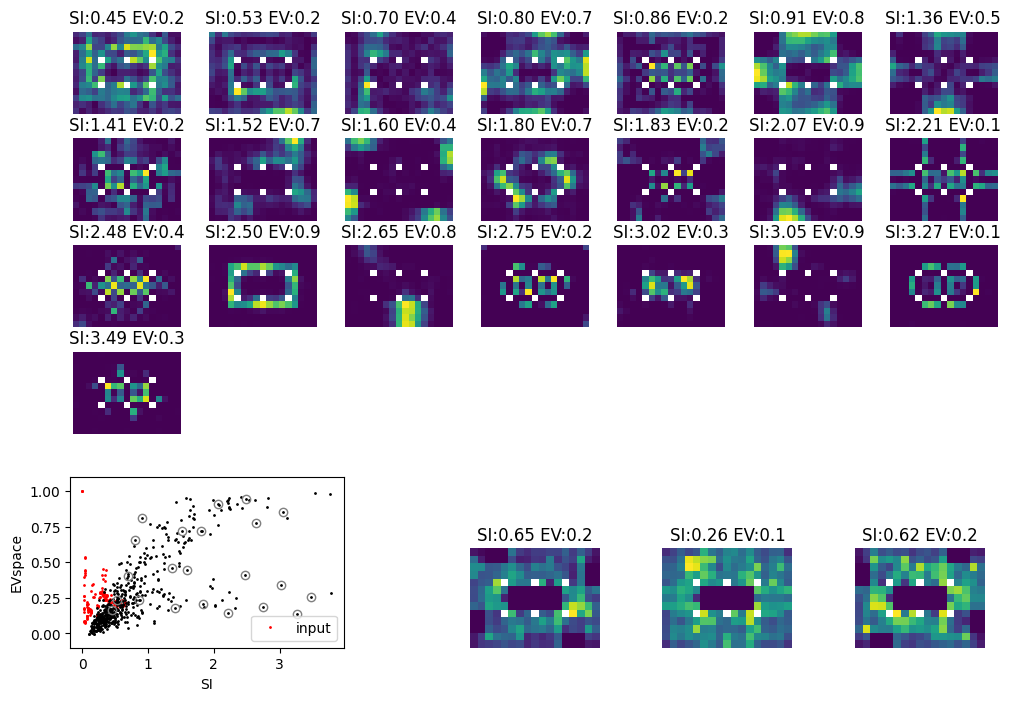

In [7]:
# LN
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

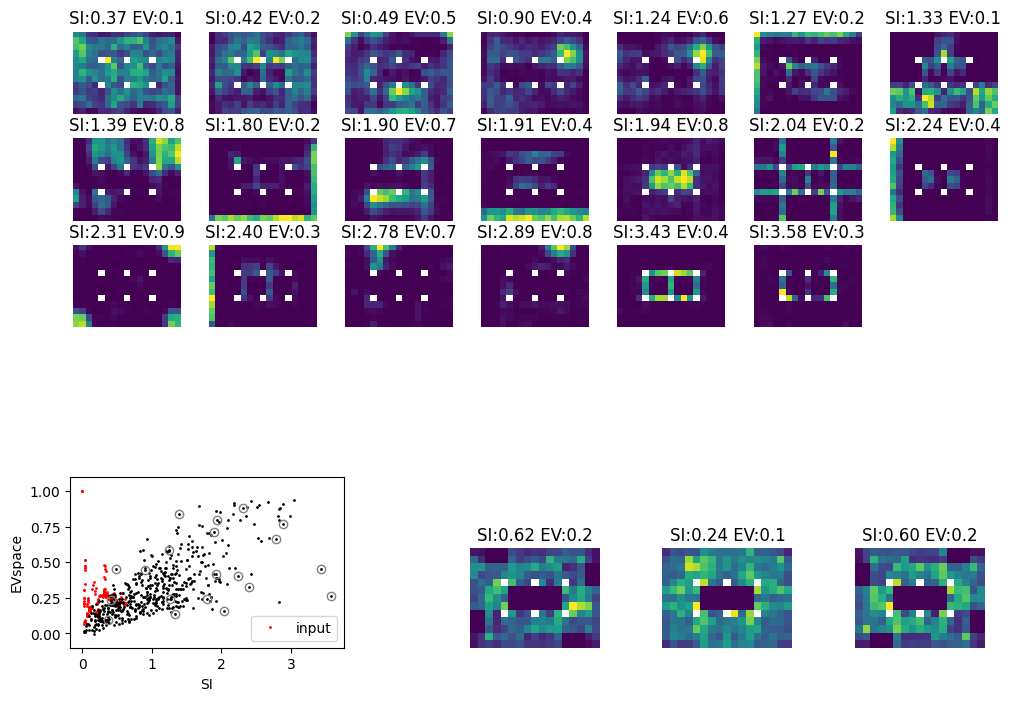

In [14]:
# k=1
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

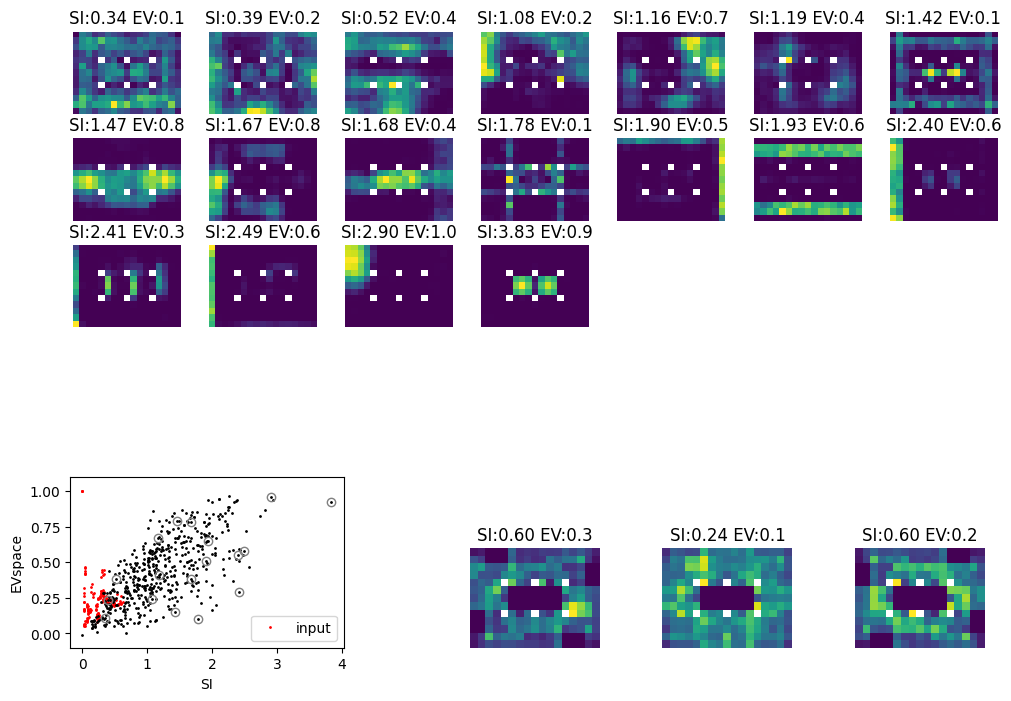

In [6]:
# k=5
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

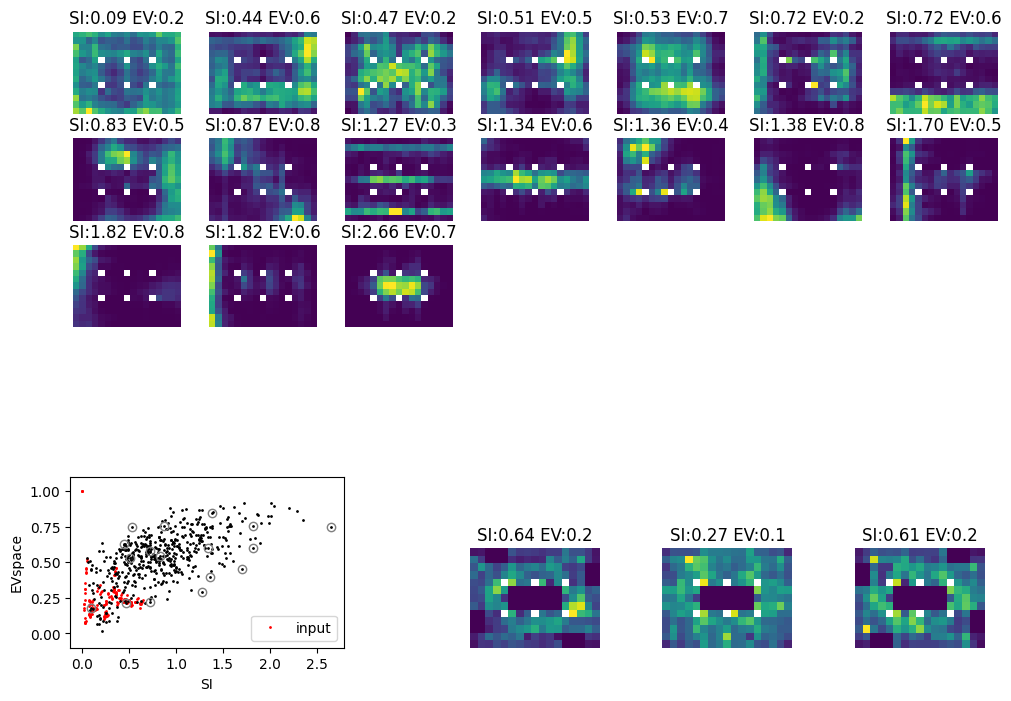

In [8]:
# theta (seq=400)
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

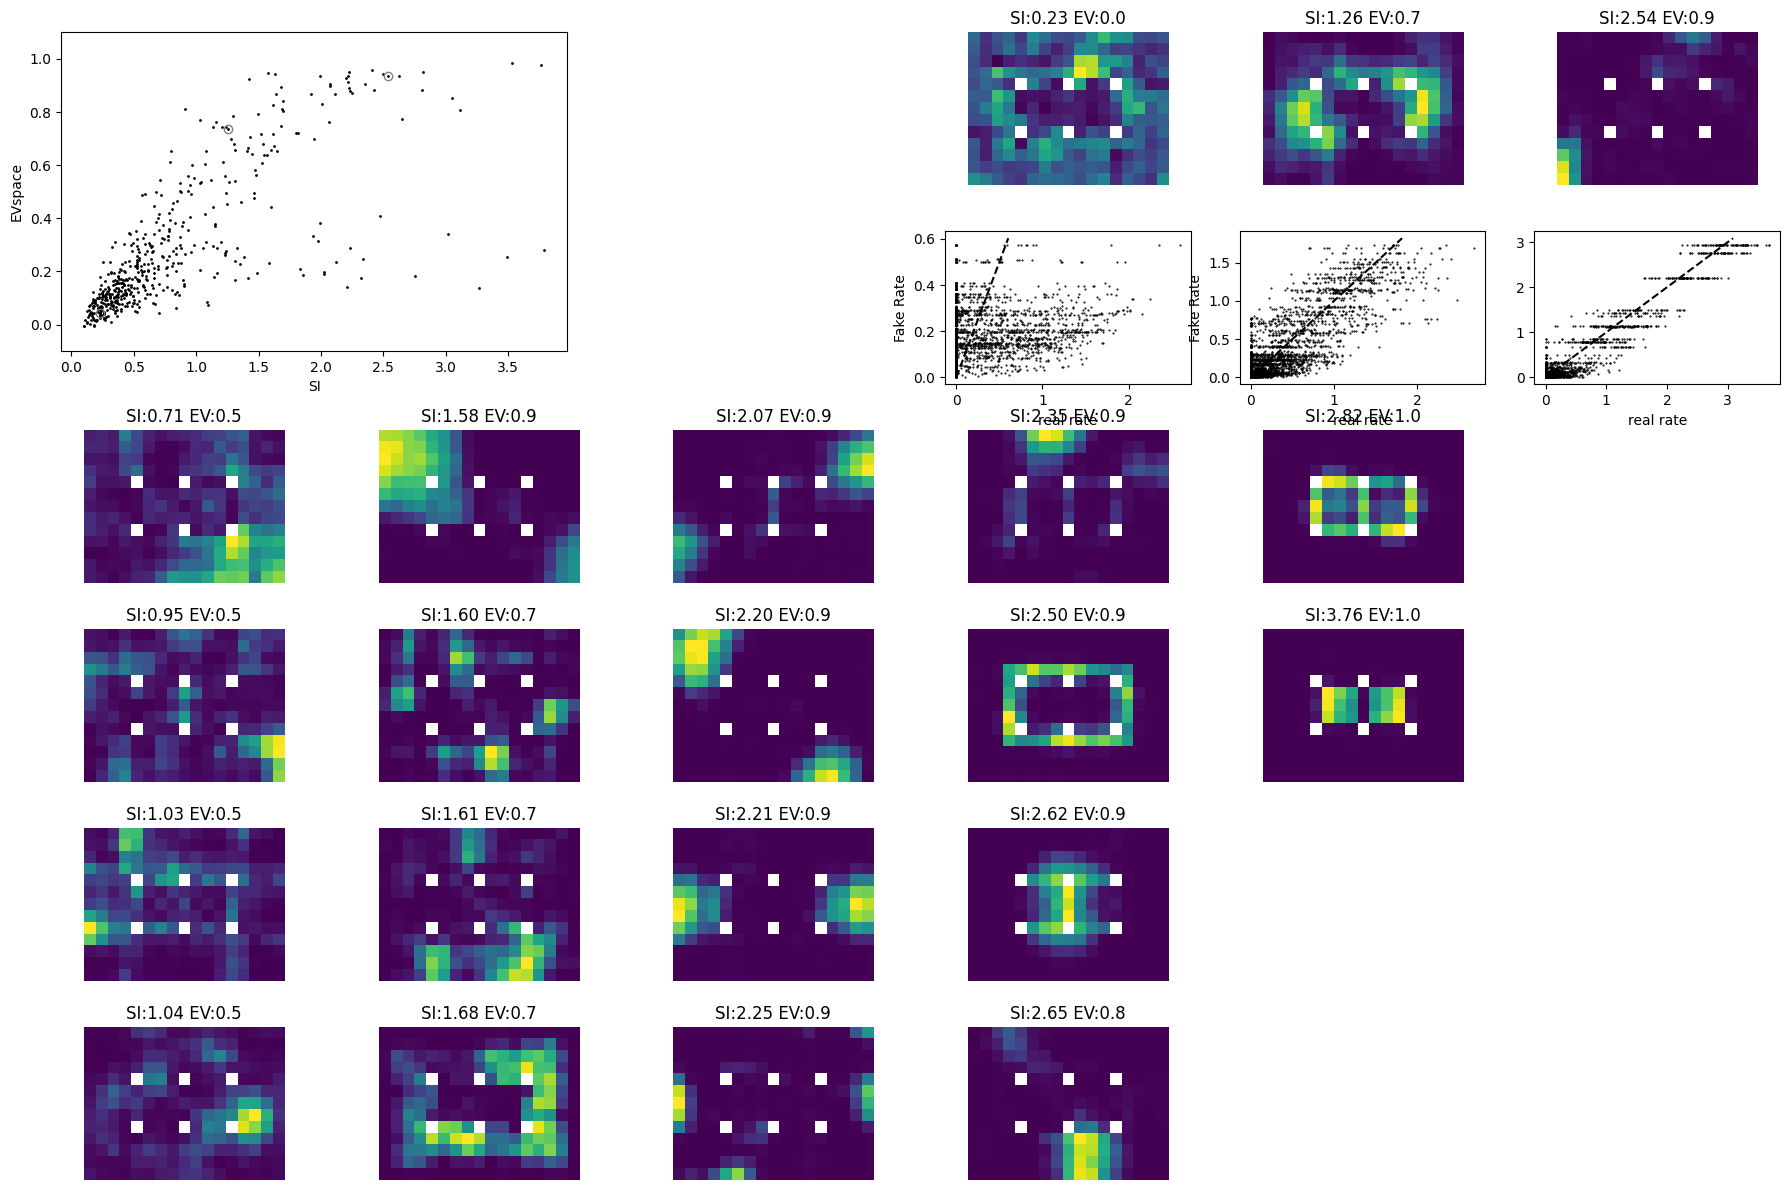

In [9]:
# LN
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

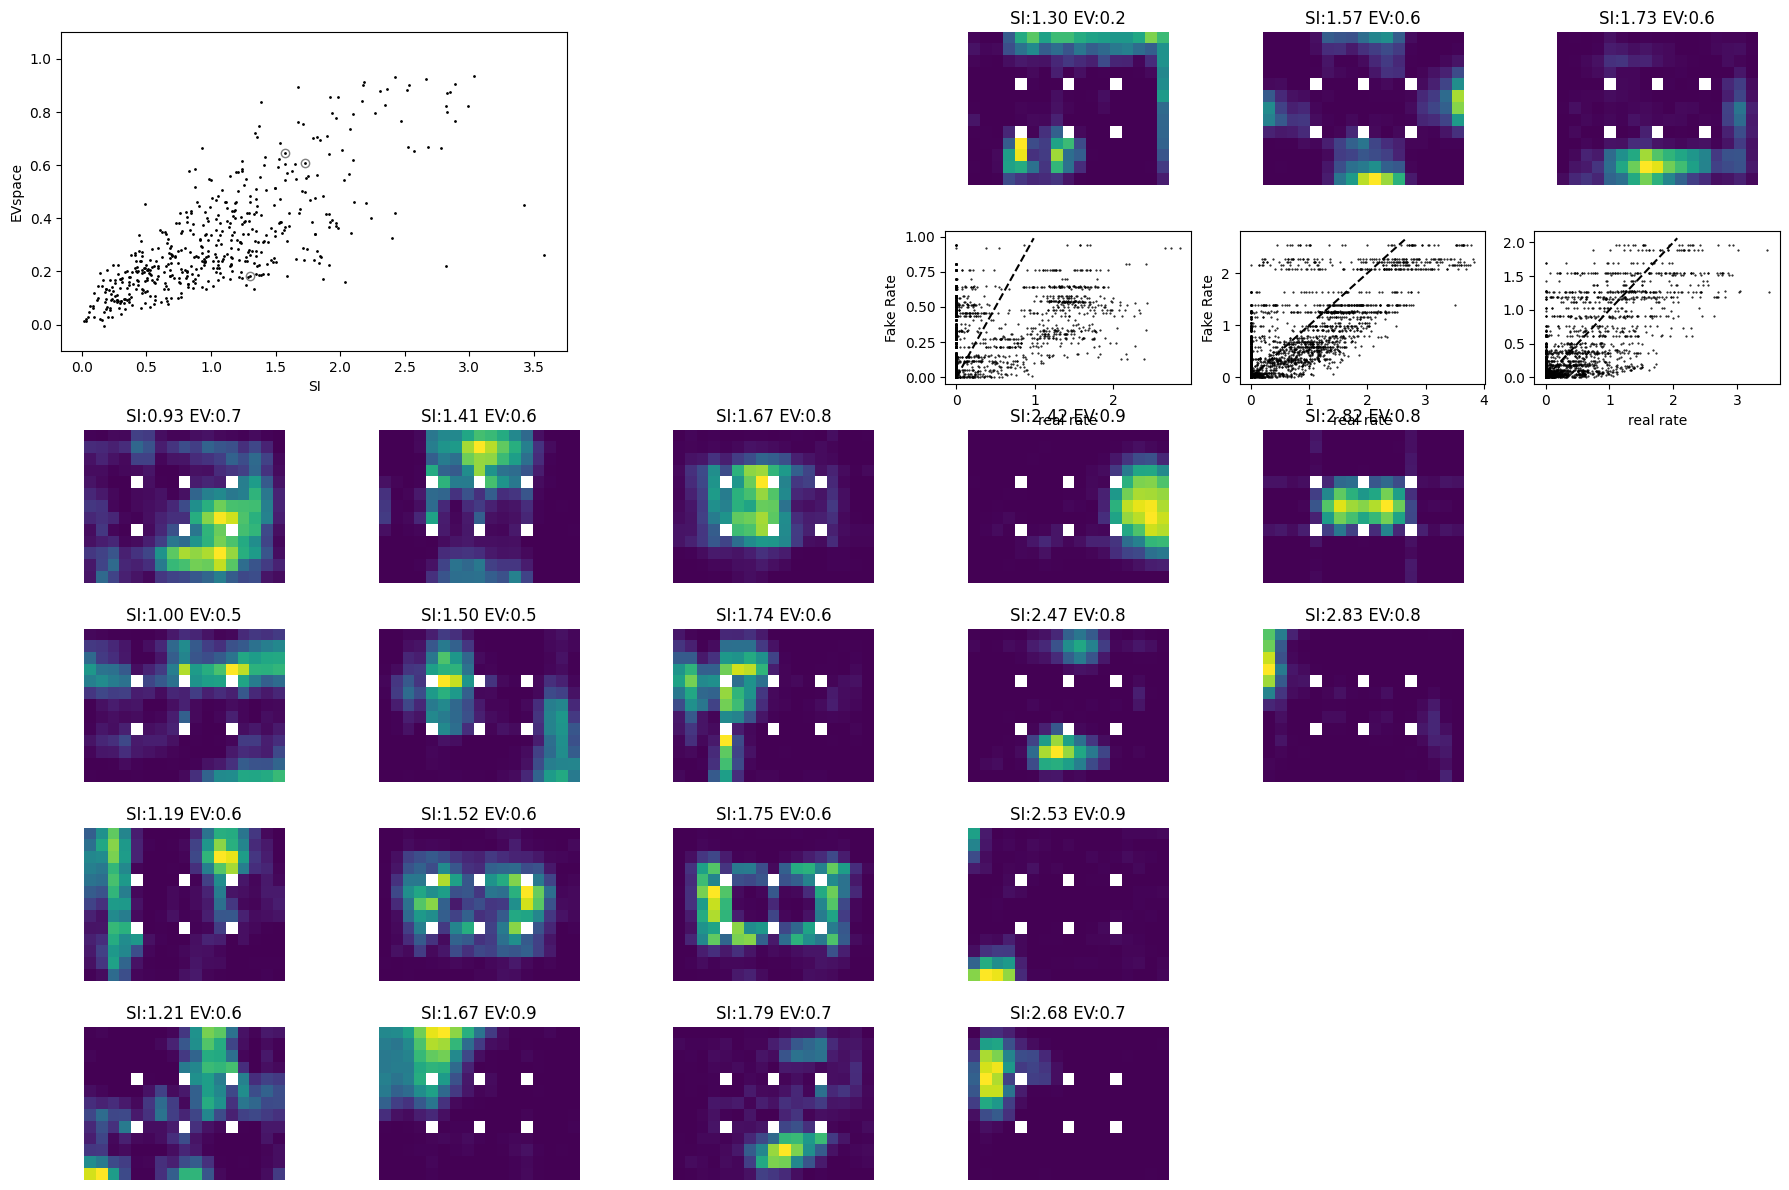

In [15]:
# k=1
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

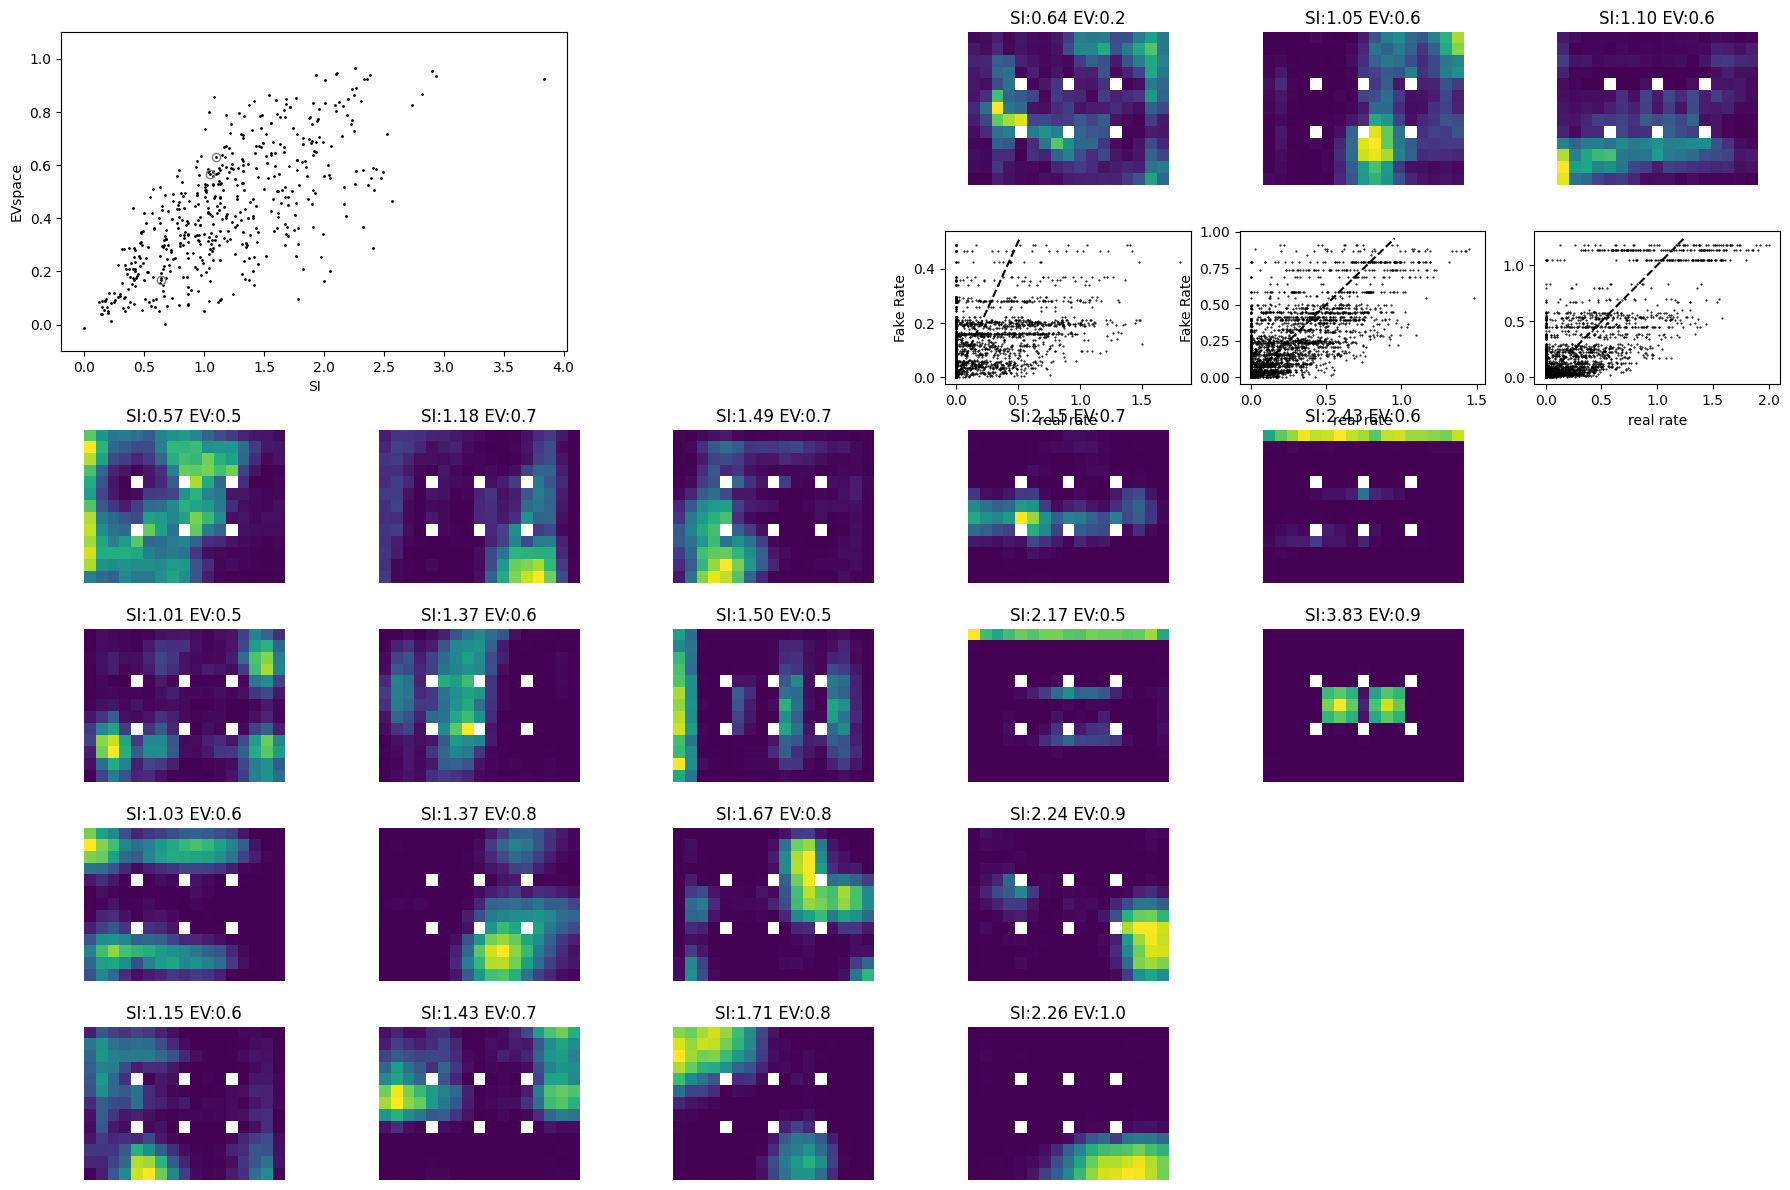

In [7]:
# k=5
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

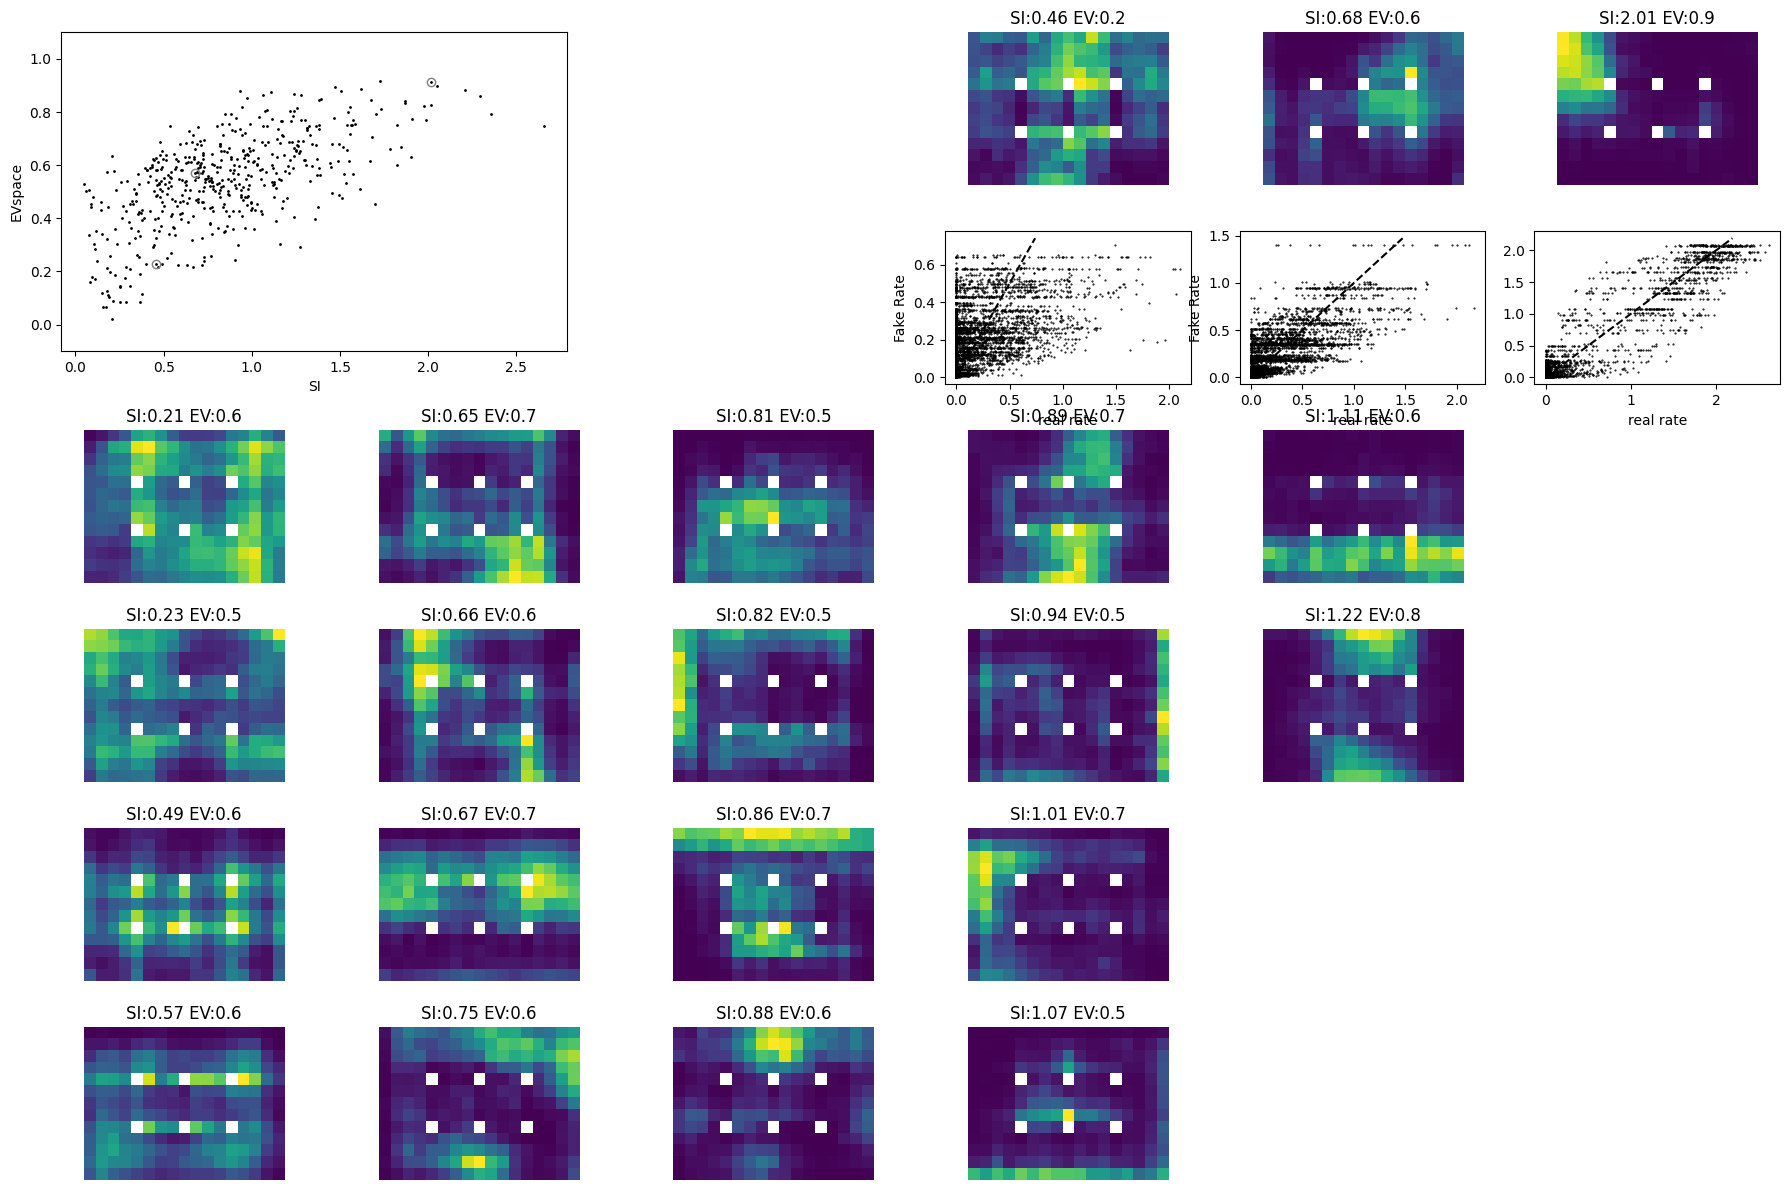

In [6]:
# theta (seq=400)
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

In [11]:
RGA = representationalGeometryAnalysis(predictiveNet,
                                    #    timesteps_wake=20000,
                                       noisemag = 0,
                                       noisestd=0.05,
                                       withIsomap=True,
                                       actRSA = False,
                                       obsRSA=False,
                                       HDRSA = False,
                                       agent=agent)

Running WAKE
Running SLEEP
Fitting Isomap


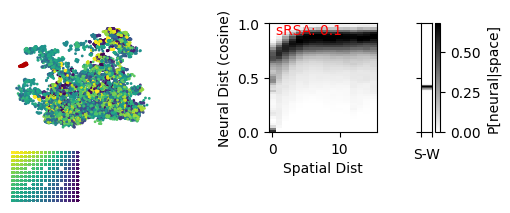

In [9]:
# LN
RGA.WakeSleepFigure(netname,savefolder)

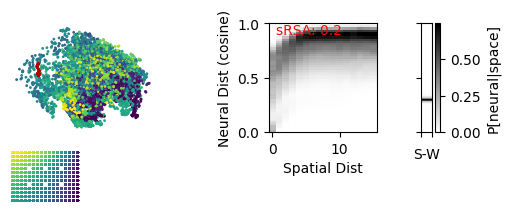

In [12]:
# k=1
RGA.WakeSleepFigure(netname,savefolder)

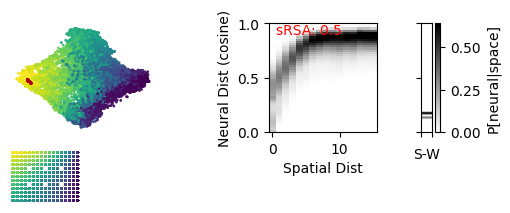

In [6]:
# k=5
RGA.WakeSleepFigure(netname,savefolder)

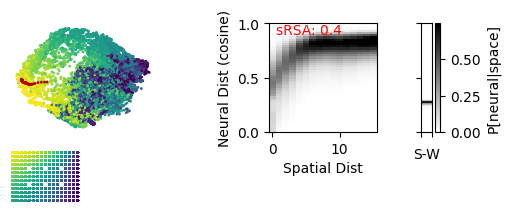

: 

In [12]:
# theta (seq=400)
RGA.WakeSleepFigure(netname,savefolder)